In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, auc
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# Extract features and target
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split into features (X) and target (y)
X = df.drop(columns=[y.columns[0]]).values  # Correct way to get target column name
# Encode target variable
y = LabelEncoder().fit_transform(y.iloc[:, 0])  # Convert target labels to 0 and 1

# Verify dataset information
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Verify if the problem is binary classification
is_binary = len(np.unique(y)) == 2
print(f"\nIs Binary Classification: {is_binary}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  int64  
 2   cap-surface           61069 non-null  int64  
 3   cap-color             61069 non-null  int64  
 4   does-bruise-or-bleed  61069 non-null  int64  
 5   gill-attachment       61069 non-null  int64  
 6   gill-spacing          61069 non-null  int64  
 7   gill-color            61069 non-null  int64  
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             61069 non-null  int64  
 11  stem-surface          61069 non-null  int64  
 12  stem-color            61069 non-null  int64  
 13  veil-type             61069 non-null  int64  
 14  veil-color            61069 non-null  int64  
 15  has-r


Results for Logistic Regression:
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.6435		0.6930	0.6994
2	0.6496		0.6929	0.6984
3	0.6547		0.6949	0.7092
4	0.6409		0.6822	0.6963
5	0.6396		0.6866	0.6926
6	0.6430		0.6971	0.7029
7	0.6421		0.6915	0.6964
8	0.6396		0.6825	0.6986
9	0.6440		0.6945	0.6975
10	0.6378		0.6860	0.6974


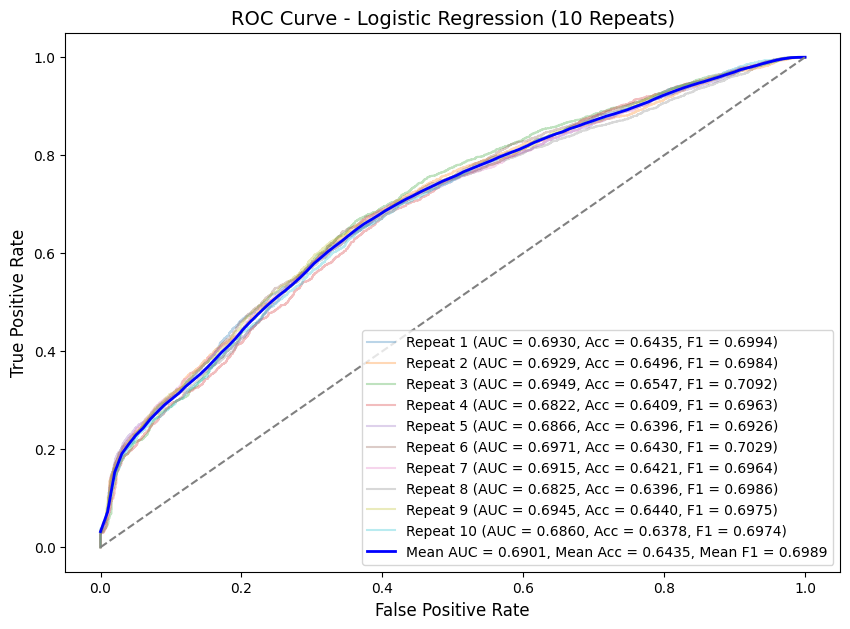


Results for Logistic Regression (L2):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.6481		0.6933	0.7019
2	0.6529		0.6948	0.7069
3	0.6550		0.6976	0.7082
4	0.6475		0.6890	0.7038
5	0.6491		0.6904	0.7015
6	0.6484		0.6974	0.7045
7	0.6445		0.6939	0.6983
8	0.6497		0.6867	0.7028
9	0.6509		0.6994	0.7029
10	0.6411		0.6867	0.6979


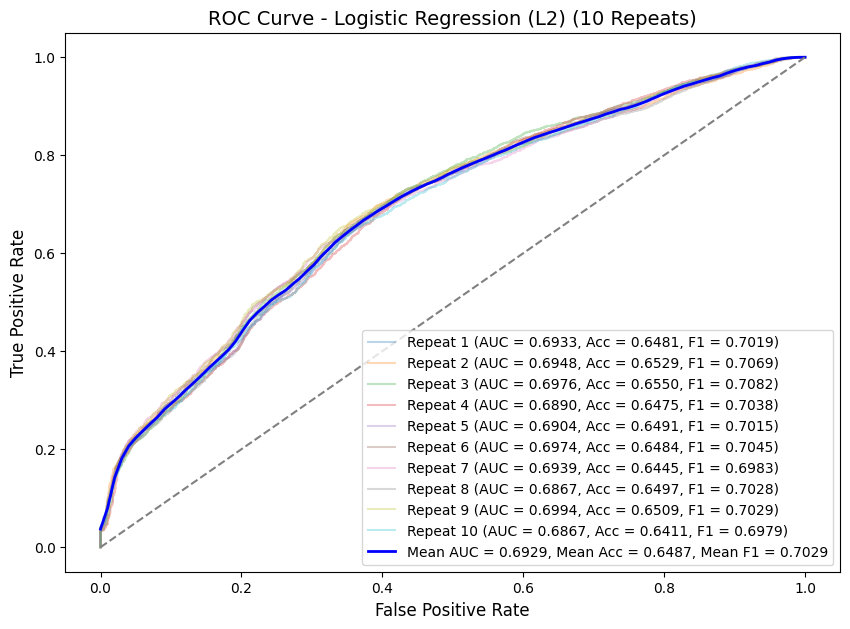


Results for Logistic Regression (L1):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.6481		0.6934	0.7020
2	0.6533		0.6948	0.7072
3	0.6547		0.6977	0.7079
4	0.6475		0.6891	0.7038
5	0.6489		0.6905	0.7012
6	0.6489		0.6974	0.7047
7	0.6443		0.6940	0.6982
8	0.6496		0.6868	0.7025
9	0.6514		0.6996	0.7034
10	0.6419		0.6867	0.6985


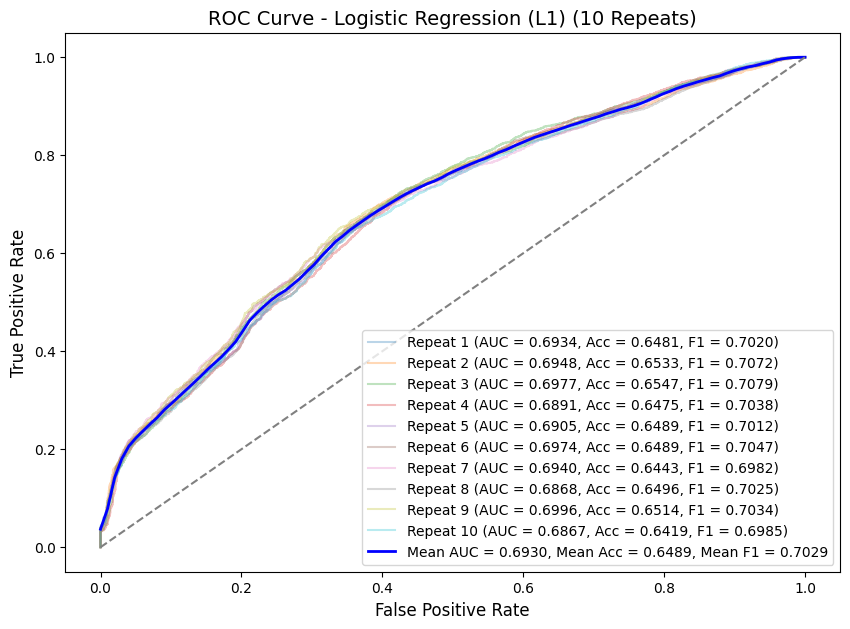


Results for 3-Layer NN:
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8312		0.9120	0.8481
2	0.7021		0.7646	0.7277
3	0.8263		0.9051	0.8451
4	0.7244		0.8061	0.7527
5	0.8232		0.9052	0.8415
6	0.7480		0.8266	0.7720
7	0.8399		0.9187	0.8562
8	0.7909		0.8788	0.8078
9	0.7812		0.8658	0.8019
10	0.7956		0.8839	0.8144


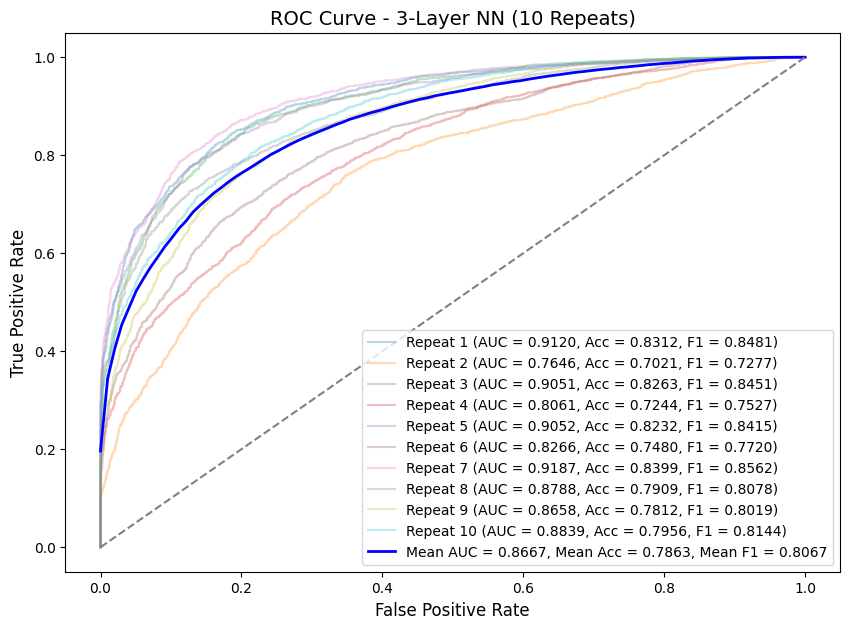


Results for 3-Layer NN (L2):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.6800		0.7631	0.7060
2	0.6818		0.7546	0.7093
3	0.6548		0.7274	0.6863
4	0.6858		0.7527	0.7143
5	0.7026		0.7723	0.7343
6	0.6895		0.7718	0.7185
7	0.6738		0.7405	0.7063
8	0.6804		0.7527	0.7082
9	0.6813		0.7489	0.7038
10	0.6802		0.7540	0.7153


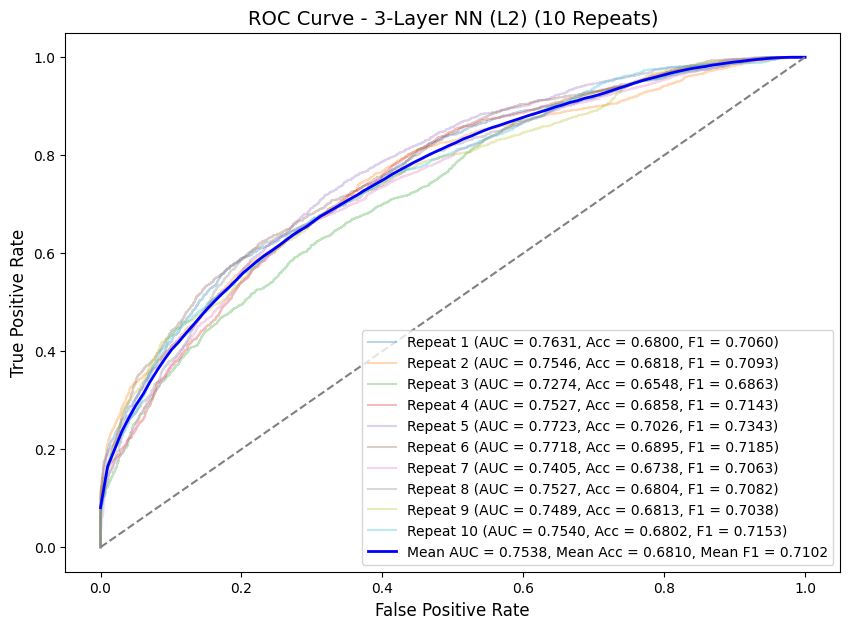


Results for 3-Layer NN (L1):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.5795		0.6157	0.6779
2	0.5916		0.6288	0.6795
3	0.5939		0.6287	0.6707
4	0.5888		0.6126	0.6746
5	0.5787		0.6166	0.6976
6	0.5829		0.6130	0.6918
7	0.5513		0.6234	0.6910
8	0.5898		0.6232	0.6748
9	0.5901		0.6365	0.6707
10	0.5648		0.6366	0.6962


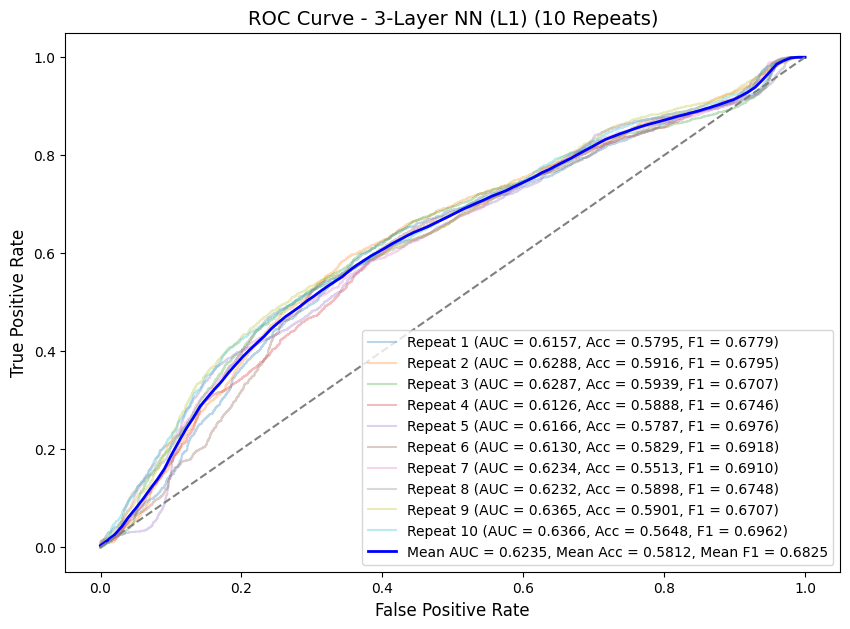

In [7]:
# Define Neural Network
class ThreeLayerNN(nn.Module):
    def __init__(self, input_size, reg_type=None, reg_lambda=0.01):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output layer for binary classification
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Sigmoid for probability output
        self.reg_type = reg_type
        self.reg_lambda = reg_lambda

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))  # Ensure output is between 0 and 1
        return x

# Function to train Neural Network and compute metrics
def train_nn_metrics(X_train, y_train, X_test, y_test, reg_type=None, reg_lambda=0.01):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

    # Initialize model
    model = ThreeLayerNN(X_train.shape[1], reg_type, reg_lambda).to(device)
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Apply regularization if specified
        if reg_type == "L1":
            l1_loss = sum(p.abs().sum() for p in model.parameters())
            loss += reg_lambda * l1_loss
        elif reg_type == "L2":
            l2_loss = sum((p ** 2).sum() for p in model.parameters())
            loss += reg_lambda * l2_loss

        loss.backward()
        optimizer.step()

    # Evaluate
    with torch.no_grad():
        y_probs = model(X_test_tensor).cpu().numpy()
        preds = (y_probs > 0.5).astype(int)

        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = roc_auc_score(y_test, y_probs)

    return fpr, tpr, auc_score, acc, f1

# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs'),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='liblinear'),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear'),
    "3-Layer NN": ("nn", None),
    "3-Layer NN (L2)": ("nn", "L2"),
    "3-Layer NN (L1)": ("nn", "L1")
}

# Training and evaluation loop
for model_name, model in models.items():
    plt.figure(figsize=(10, 7))
    mean_fpr = np.linspace(0, 1, 100)
    tprs, aucs, accs, f1s = [], [], [], []
    
    print(f"\nResults for {model_name}:")
    print("Repeat\tAccuracy\tAUC\t\tF-Measure")
    print("-" * 50)
    
    for repeat in range(10):
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=repeat)
        train_index, test_index = next(skf.split(X, y))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        if isinstance(model, tuple) and model[0] == "nn":
            reg_type = model[1]
            fpr, tpr, auc_score, acc, f1 = train_nn_metrics(X_train, y_train, X_test, y_test, reg_type=reg_type)
        else:
            model.fit(X_train, y_train)
            y_probs = model.predict_proba(X_test)[:, 1]
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            f1 = f1_score(y_test, preds, average="binary")  # Ensure correct averaging
            fpr, tpr, _ = roc_curve(y_test, y_probs)
            auc_score = roc_auc_score(y_test, y_probs)
        
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(auc_score)
        accs.append(acc)
        f1s.append(f1)
        
        print(f"{repeat+1}\t{acc:.4f}\t\t{auc_score:.4f}\t{f1:.4f}")
        plt.plot(fpr, tpr, alpha=0.3, label=f"Repeat {repeat+1} (AUC = {auc_score:.4f}, Acc = {acc:.4f}, F1 = {f1:.4f})")

    # Compute means
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = np.mean(aucs)
    mean_acc = np.mean(accs)
    mean_f1 = np.mean(f1s)

    # Fixed legend formatting
    plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, 
             label=f"Mean AUC = {mean_auc:.4f}, Mean Acc = {mean_acc:.4f}, Mean F1 = {mean_f1:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

    plt.title(f"ROC Curve - {model_name} (10 Repeats)", fontsize=14)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right", fontsize=10)
    plt.show()



In [8]:
import numpy as np
from scipy.stats import ttest_rel
import itertools
import pandas as pd

# Define accuracy results for each model
logreg = [0.6435, 0.6496, 0.6547, 0.6409, 0.6396, 0.6430, 0.6421, 0.6396, 0.6440, 0.6378]
logreg_l2 = [0.6481, 0.6529, 0.6550, 0.6475, 0.6491, 0.6484, 0.6445, 0.6497, 0.6509, 0.6411]
logreg_l1 = [0.6481, 0.6533, 0.6547, 0.6475, 0.6489, 0.6489, 0.6443, 0.6496, 0.6514, 0.6419]
nn = [0.8312, 0.7021, 0.8263, 0.7244, 0.8232, 0.7480, 0.8399, 0.7909, 0.7812, 0.7956]
nn_l2 = [0.6800, 0.6818, 0.6548, 0.6858, 0.7026, 0.6895, 0.6738, 0.6804, 0.6813, 0.6802]
nn_l1 = [0.5795, 0.5916, 0.5939, 0.5888, 0.5787, 0.5829, 0.5513, 0.5898, 0.5901, 0.5648]

# Store model names and accuracy lists
model_names = [
    "Logistic Regression", 
    "Logistic Regression (L2)", 
    "Logistic Regression (L1)", 
    "3-Layer NN", 
    "3-Layer NN (L2)", 
    "3-Layer NN (L1)"
]
model_accuracies = [logreg, logreg_l2, logreg_l1, nn, nn_l2, nn_l1]

# Perform paired t-tests and store results
alpha = 0.05  # Significance level
results = []

for (i, j) in itertools.combinations(range(len(model_names)), 2):
    stat, p = ttest_rel(model_accuracies[i], model_accuracies[j])
    significant = "Yes" if p < alpha else "No"
    results.append([model_names[i], model_names[j], stat, p, significant])

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results, columns=["Model 1", "Model 2", "t-statistic", "p-value", "Significant Difference?"])

# Print results
print(results_df.to_string(index=False))


                 Model 1                  Model 2  t-statistic      p-value Significant Difference?
     Logistic Regression Logistic Regression (L2)    -5.335593 4.712000e-04                     Yes
     Logistic Regression Logistic Regression (L1)    -5.482190 3.890577e-04                     Yes
     Logistic Regression               3-Layer NN    -9.356674 6.205890e-06                     Yes
     Logistic Regression          3-Layer NN (L2)    -7.454480 3.873809e-05                     Yes
     Logistic Regression          3-Layer NN (L1)    16.478947 4.972383e-08                     Yes
Logistic Regression (L2) Logistic Regression (L1)    -1.172106 2.712461e-01                      No
Logistic Regression (L2)               3-Layer NN    -8.968354 8.787577e-06                     Yes
Logistic Regression (L2)          3-Layer NN (L2)    -7.448867 3.896801e-05                     Yes
Logistic Regression (L2)          3-Layer NN (L1)    20.163644 8.449754e-09                     Yes


**Neural Networks (without L1 regularization) outperform Logistic Regression models.
L2 regularization negatively impacts NN performance, but not as drastically as L1 regularization.
L1 and L2 regularization in Logistic Regression do not show significant differences.
Avoid using L1 regularization on neural networks, as it drastically reduces performance.**